<a href="https://colab.research.google.com/github/minhnvm2307/ML-DL-Colaboratory/blob/main/ml/Machine_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

## Introdution

*w: weight*

*b: bias*

*x: input*

### 1. Sigmoid Function:
  $$ f(w, b) = \frac{1}{1 + e^{-(\vec w * \vec x + b)}}$$

### 2. ReLU Function (Rectified Linear Unit):
  $$ f(w, b) = max(0, (\vec w * \vec x + b)) $$

## Loss function

### 1. MSE - Mean Square Equation
  $$ J(w, b) = \frac 1 m * \sum (f(w, b) - y)^2 $$

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -q kaggle
!pip install -q tensorflow

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download prokshitha/home-value-insights

Dataset URL: https://www.kaggle.com/datasets/prokshitha/home-value-insights
License(s): other


In [ ]:
! unzip home-value-insights.zip

Archive:  home-value-insights.zip
  inflating: house_price_regression_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.optimizers import Adam
from keras.layers import Dense, Input

In [ ]:
# load dataset
raw_data = pd.read_csv('house_price_regression_dataset.csv')

In [ ]:
raw_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
print(raw_data.shape)

(1000, 8)


# Hiển thị sự tương quan giữa Price với các feature khác

- Squared_footage vs Price
- Lot_Size vs Price
- Neighborhood_quality  vs Price

In [ ]:
# Statistic
raw_data.describe(include='all')

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [ ]:
# Show the correlation of feature
raw_data.corr(method='spearman')

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043303,-0.031387,-0.022243,0.089778,0.029925,-0.007949,0.991602
Num_Bedrooms,-0.043303,1.000000,0.023319,-0.015463,-0.009396,0.113815,-0.049141,0.013095
Num_Bathrooms,-0.031387,0.023319,1.000000,-0.021139,0.034918,0.024570,0.017639,-0.002720
Year_Built,-0.022243,-0.015463,-0.021139,1.000000,-0.060656,-0.025677,-0.009803,0.047417
Lot_Size,0.089778,-0.009396,0.034918,-0.060656,1.000000,0.003319,0.037855,0.158074
Garage_Size,0.029925,0.113815,0.024570,-0.025677,0.003319,1.000000,-0.011293,0.050103
Neighborhood_Quality,-0.007949,-0.049141,0.017639,-0.009803,0.037855,-0.011293,1.000000,-0.009696
House_Price,0.991602,0.013095,-0.002720,0.047417,0.158074,0.050103,-0.009696,1.000000


In [ ]:
sample_data = raw_data[:20][:]
print(sample_data.shape)

(20, 8)


In [ ]:
x_train = sample_data[:]["Square_Footage"]
y_train = sample_data[:]["House_Price"]

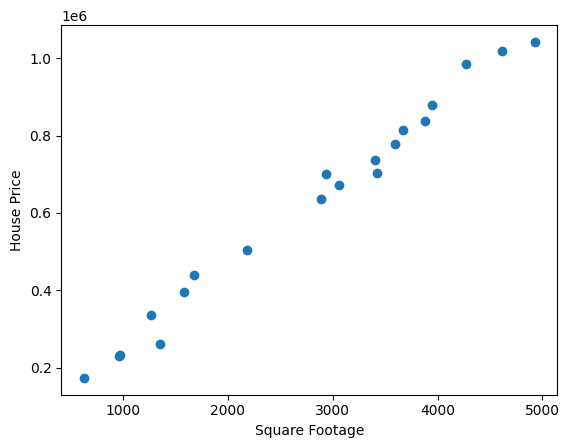

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel("Square Footage")
plt.ylabel("House Price")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Retrieve collumn 0 and 7 in raw data
pre_X_data = raw_data.iloc[:, [0]]
pre_Y_data = raw_data.iloc[:, [7]]

# Load training set and test set
x_train, x_test, y_train, y_test = train_test_split(pre_X_data, pre_Y_data)
print(f'Training shape: {x_train.shape}\nTesting shape: {x_test.shape}')


Training shape: (750, 1)
Testing shape: (250, 1)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(f"Accuracy score: {model.score(x_test, y_test)*100} %")

Accuracy score: 98.20188780637714 %


In [ ]:
square_footage = np.array(1000)
print("Prediction of house price:", model.predict(square_footage.reshape(1, 1)))

Prediction of house price: [[256295.40304766]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Another linear sample of Relation of children height and theri parents height


In [ ]:
!kaggle